# * Kurapati Venkatesh

# * 09012021

# * Topic: Simple Linear Regression ✨

# ---------------------------------------------------------------------------

## Problem Statement:

## A certain organization wanted an early estimate of their employee churn out rate. So, the HR department came up with data regarding the employee’s salary hike and churn out rate for a financial year. The analytics team will have to perform a deep analysis and predict an estimate of employee churn and present the statistics. Approach –A Simple Linear regression model needs to be built with target variable ‘Churn_out_rate’. Apply necessary transformations and record the RMSE values, Correlation coefficient values for different transformation models.

## -----------------------------------------------------------------------------------

### Problem Objective:
##### A Simple Linear regression model needs to be built with target variable ‘Churn_out_rate’

## -------------------------------------------------------------------------------------------

## Import libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

## import dataset:

In [2]:
sc=pd.read_csv(r"G:\360digit\assignments meterial\SLR\emp_data.csv")

## Data Exploration:

In [3]:
sc

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72
5,1690,70
6,1706,68
7,1730,65
8,1800,62
9,1870,60


In [6]:
sc=sc.rename(columns={'Salary_hike': 'sh','Churn_out_rate': 'cr' })

In [7]:
sc.head()

,sh,cr
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


In [8]:
sc.corr()

,sh,cr
sh,1.000000,-0.911722
cr,-0.911722,1.000000


Text(0, 0.5, 'Churn Out Rate')

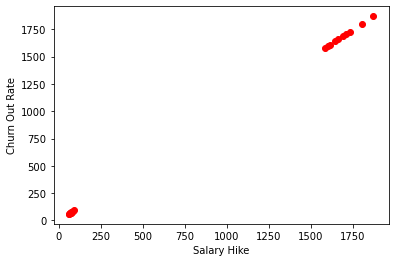

In [9]:
plt.scatter(x=sc, y=sc, color='red')
plt.xlabel("Salary Hike")
plt.ylabel("Churn Out Rate")

In [11]:
sc.describe()

,sh,cr
count,10.000000,10.000000
mean,1688.600000,72.900000
std,92.096809,10.257247
min,1580.000000,60.000000
25%,1617.500000,65.750000
50%,1675.000000,71.000000
75%,1724.000000,78.750000
max,1870.000000,92.000000


### Importing statsmodels.formula.api for linear regression model:

In [12]:
import statsmodels.formula.api as smf

In [13]:
model=smf.ols("cr~sh",data=sc).fit()

In [14]:
model.params

Intercept    244.364911
sh            -0.101543
dtype: float64

In [15]:
model.summary()

C:\Users\Hp\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     cr   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           0.000239
Time:                        21:49:32   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    244.3649     27.352      8.934      0.000     181.291     307.439
sh            -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The statistics we are mainly concerned with to determine whether the model is viable or not are:
* The coefficients and its p-value(significance)
* R-squared value
* F-statistic and its significance

### Inferences from model:

1. The coefficient for sh is -0.1015, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.
2. We have to make sure that the p-value should always be less for the coefficient to be significant.
3. R-squared value is 0.831, which means that 83.1% of the Churn out rate variance can be explained by the Salary hike column using this line.
4. Prob F-statistic has a very low p-value, which gives us that the model fit is not a statistically significant.

In [16]:
model.conf_int(0.05) # 95% confidence interval

,0,1
Intercept,181.291232,307.438591
sh,-0.138845,-0.064240


In [17]:
pred = model.predict(sc) # Predicted values of wg using the model

In [18]:
sqrt(mean_squared_error(sc.cr, pred))

3.997528462337793

### Visualization of regression line over the scatter plot of st & dt:

Text(0.5, 0, 'Salary Hike')

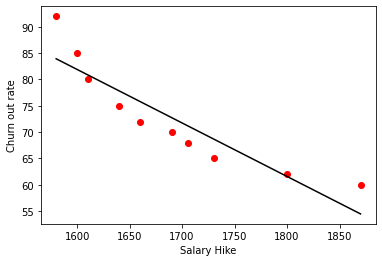

In [19]:
plt.scatter(x=sc.sh, y=sc.cr, color='red')
plt.plot(sc.sh, pred,color='black')
plt.ylabel("Churn out rate")
plt.xlabel("Salary Hike")

In [21]:
pred.corr(sc.cr)

0.9117216186909112

### Transforming variables for accuracy:

In [22]:
model1 = smf.ols('cr~np.log(sh)',data=sc ).fit()

In [23]:
model1.params

Intercept     1381.456193
np.log(sh)    -176.109735
dtype: float64

In [25]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     cr   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.85
Date:                Wed, 14 Apr 2021   Prob (F-statistic):           0.000153
Time:                        21:53:55   Log-Likelihood:                -27.502
No. Observations:                  10   AIC:                             59.00
Df Residuals:                       8   BIC:                             59.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1381.4562    195.402      7.070      0.000     930.858    1832.054
np.log(sh)  -176.1097     26.297     -6.697      0.000    -236.751    -115.468
==============================================================================
Omnibus:                        2.213   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.418
Skew:                           0.853   Prob(JB):                        0.492
Kurtosis:                       2.298   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Inferences from model1:

1. The coefficient for dt is -176.1097, and its corresponding p-value is very low, almost 0. That means the coefficient is statistically significant.
2. We have to make sure that the p-value should always be less for the coefficient to be significant.
3. R-squared value is 0.849, which means that 84.9% of the churn out rate variance can be explained by the salary hike column using this line.
4. Prob F-statistic has a very low p-value, which gives us that the model fit is a statistically significant.

In [26]:
model1.conf_int(0.01)

,0,1
Intercept,725.806856,2037.105529
np.log(sh),-264.347078,-87.872392


In [28]:
pred1 = model1.predict(sc)

In [30]:
sqrt(mean_squared_error(sc.cr, pred1))

3.7860036130227708

In [31]:
pred1.corr(sc.cr)

0.921207731211886

## Conclusion:

Model having highest R-Squared value is better i.e. (model1=0.849 is better than model=0.831). There has good relationship>0.85